## Final Project Submission

Please fill out:
* Student name: Kathryn Davé
* Student pace: self paced
* Scheduled project review date/time: Tuesday, 12/4/18 @ 12pm
* Instructor name: Eli Thomas
* Blog post URL: tbd


In [62]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

In [63]:
# Read data file
df = pd.read_csv('kc_house_data.csv')

In [64]:
# Take an itial look at the data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [65]:
df.grade.value_counts().nlargest(10)

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
Name: grade, dtype: int64

In [66]:
# Take a look at the column names
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [67]:
# Take a look at the column types and amount of rows/data in each
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [68]:
# id & data are meaningless to my investigation so I'll delete them:
df= df.drop(['id','date'], axis=1)

In [69]:
# Check that they are gone:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [70]:
# sqft_basement is a string type and should be an integer. There are some non-numeric values in the column- '?'.
# Count how many '?' there are:
numeric_values_sqft_basement = sum(df.sqft_basement.str.count('0.0'))
total_rows = df.shape[0]
number_nonnumeric_sqft_basement = total_rows - numeric_values_sqft_basement
number_nonnumeric_sqft_basement

523

In [71]:
# There are 523 '?' unknown basement square footage. I'm going to force to 0 because it is a relatively
# Small portion of the total data
df.sqft_basement = df.sqft_basement.str.replace('?', '0')

In [72]:
# Change sqft_basement to an int & check:
df.sqft_basement = df.sqft_basement.astype(float).astype(int)
df.sqft_basement.dtype

dtype('int64')

In [73]:
# Checking for how many null values in yr_renovated:
df.yr_renovated.isna().sum()

3842

In [74]:
# There are 3842 NaN in years renovated. I'm going to force them 0 & change the data type to integer & check:
df.yr_renovated = df.yr_renovated.fillna('0')
df.yr_renovated = df.yr_renovated.astype(int)
df.yr_renovated.dtype

dtype('int64')

In [75]:
# Check for other columns with null values:
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [76]:
# Waterfront & view have null values that I'm also going to force 0, make an integer datatype & check:
df.waterfront = df.waterfront.fillna('0')
df.view = df.view.fillna('0')
df.waterfront = df.waterfront.astype(int)
df.view = df.view.astype(int)
print("waterfront: ", df.waterfront.dtype, sum(df.waterfront.isna()))
print("view: ", df.view.dtype, sum(df.view.isna()))

waterfront:  int64 0
view:  int64 0


In [77]:
# Look at the statistical breakdown of the columns:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


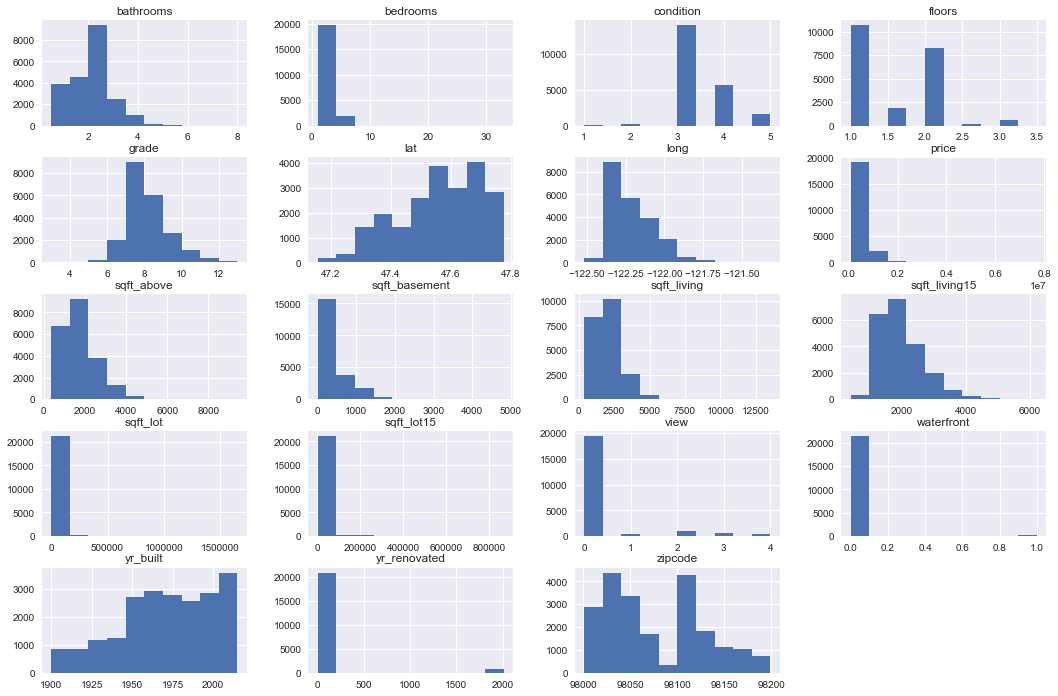

In [78]:
# Look at histograms of columns to determine normality:
df.hist(figsize=(18,12));
# Positive skew: bathrooms, bedrooms, long, price, sqft_living, sqft_living15, sqft_above, sqft_basement, sqft_lot, sqft_lot15
# Negative skew: lat
# Categorical variables: grade, condition, floors, view, waterfront, zipcode, yr_built, yr_renovated

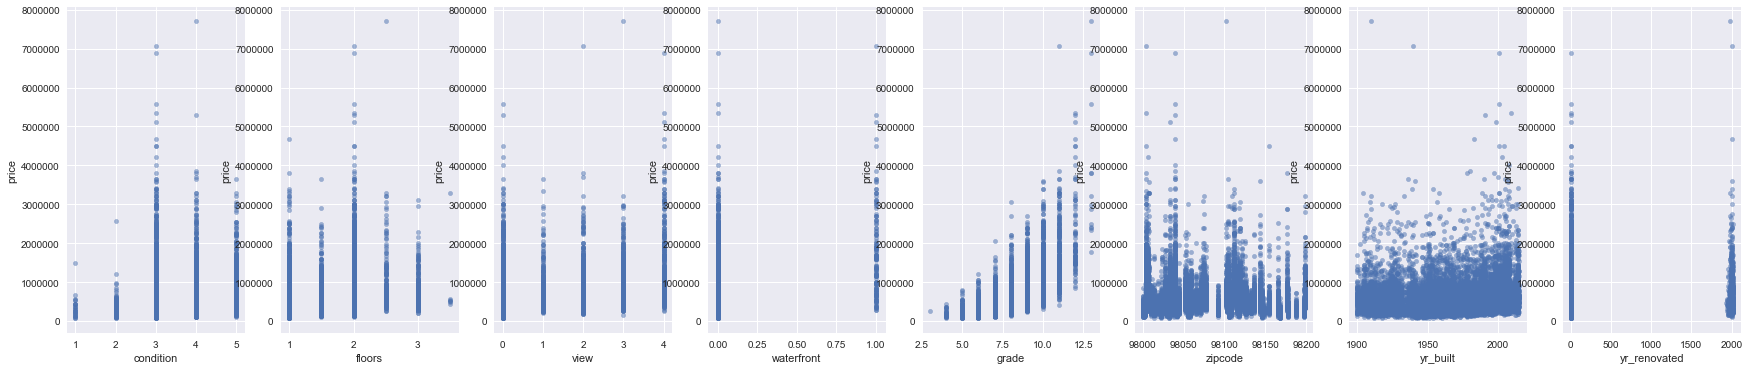

In [79]:
# Look at scatter plots of proposed categorical values to confirm:
fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(30, 6))
for xcol, ax in zip(['condition','floors','view','waterfront','grade','zipcode','yr_built','yr_renovated'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.5)
# They do appear to be categorical. Grade has very linear looking relationship.

In [80]:
# Log transform continuous variables that have non-normal distributions with skewness:
df_log = pd.DataFrame([])
df_log["log_bathrooms"] = np.log(df["bathrooms"])
df_log["log_bedrooms"] = np.log(df["bedrooms"])
df_log["log_price"] = np.log(df["price"])
df_log["log_sqft_above"] = np.log(df["sqft_above"])
df_log["log_sqft_living"] = np.log(df["sqft_living"])
df_log["log_sqft_living15"] = np.log(df["sqft_living15"])
df_log["log_sqft_lot"] = np.log(df["sqft_lot"])
df_log["log_sqft_lot15"] = np.log(df["sqft_lot15"])
df_log["log_lat"] = np.log(df["lat"])
df_log["log_long"] = np.log(np.absolute(df["long"])) #used the absolute value of longitude to be able to log-transform

0      13280
600      217
Name: sqft_basement, dtype: int64

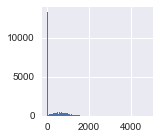

In [81]:
# I couldn't log-transform sqft_basement because it contains many 0s
df.sqft_basement.hist(bins=100, figsize=(2,2));
df.sqft_basement.value_counts().nlargest(2)

In [82]:
# So I will replace the 0s with a very small value and then log-transform:
df.sqft_basement = df.sqft_basement.replace(0, 0.00001)
df_log["log_sqft_basement"] = np.log(df["sqft_basement"])

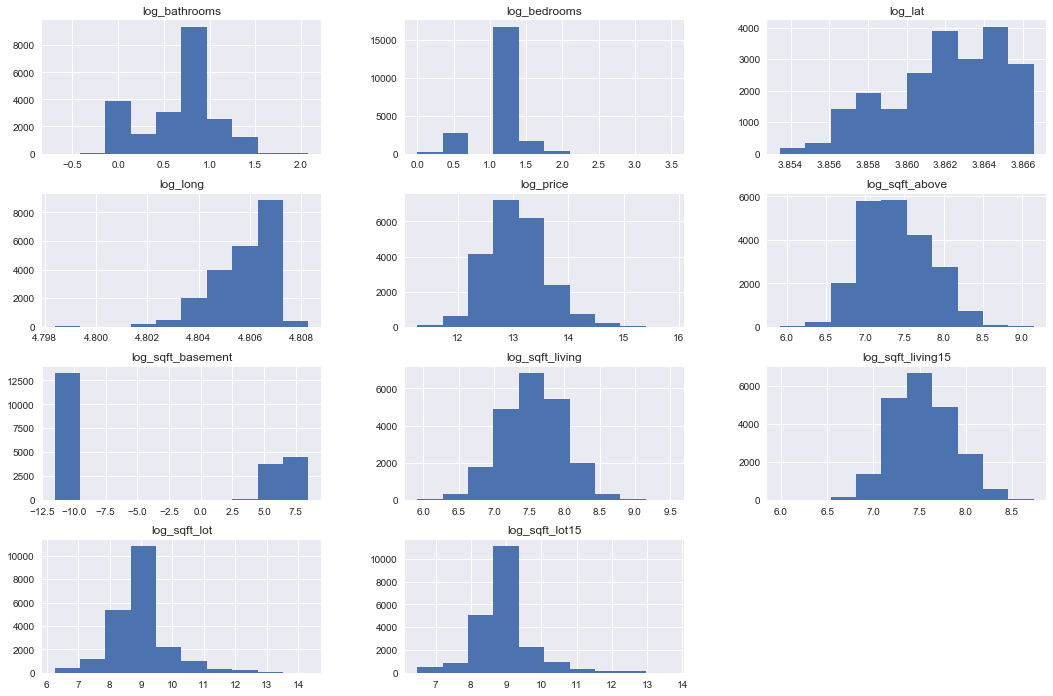

In [83]:
# Look at the new log-transformed histograms and check for normality:
df_log.hist(figsize=(18,12));

In [84]:
from sklearn import preprocessing
#standardize the scale of the log-transformed variables:
log_std_scale = preprocessing.StandardScaler().fit(df_log[['log_bathrooms','log_bedrooms','log_price','log_sqft_above','log_sqft_living','log_sqft_living15','log_sqft_lot','log_sqft_lot15', 'log_lat', 'log_long', 'log_sqft_basement']])
df_log_std = log_std_scale.transform(df_log[['log_bathrooms', 'log_bedrooms', 'log_price', 'log_sqft_above','log_sqft_living', 'log_sqft_living15', 'log_sqft_lot','log_sqft_lot15', 'log_lat', 'log_long', 'log_sqft_basement']])
df_log_std = pd.DataFrame(df_log_std, columns=['log_bathrooms', 'log_bedrooms', 'log_price', 'log_sqft_above','log_sqft_living', 'log_sqft_living15', 'log_sqft_lot','log_sqft_lot15', 'log_lat', 'log_long', 'log_sqft_basement'])

In [85]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0.00001,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400.00000,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0.00001,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910.00000,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0.00001,1987,0,98074,47.6168,-122.045,1800,7503


In [86]:
df_log.head()

,log_bathrooms,log_bedrooms,log_price,log_sqft_above,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15,log_lat,log_long,log_sqft_basement
0,0.000000,1.098612,12.309982,7.073270,7.073270,7.200425,8.639411,8.639411,3.860965,4.806125,-11.512925
1,0.810930,1.098612,13.195614,7.682482,7.851661,7.432484,8.887653,8.941022,3.865372,4.806632,5.991465
2,0.000000,0.693147,12.100712,6.646391,6.646391,7.908387,9.210340,8.994917,3.865726,4.805929,-11.512925
3,1.098612,1.386294,13.311329,6.956545,7.580700,7.215240,8.517193,8.517193,3.861168,4.807237,6.813445
4,0.693147,1.098612,13.142166,7.426549,7.426549,7.495542,8.997147,8.923058,3.863186,4.804390,-11.512925


In [87]:
df_log_std.head()

,log_bathrooms,log_bedrooms,log_price,log_sqft_above,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15,log_lat,log_long,log_sqft_basement
0,-1.726549,-0.279725,-1.402030,-0.753583,-1.125582,-1.035453,-0.388439,-0.395459,-0.351367,0.306061,-0.790571
1,0.339661,-0.279725,0.279945,0.672709,0.709463,-0.326789,-0.113243,-0.024288,1.160045,0.746159,1.211195
2,-1.726549,-1.711651,-1.799472,-1.752995,-2.131943,1.126531,0.244481,0.042037,1.281504,0.135640,-0.790571
3,1.072660,0.736243,0.499710,-1.026858,0.070676,-0.990210,-0.523926,-0.545863,-0.282062,1.271146,1.305195
4,0.039555,-0.279725,0.178438,0.073516,-0.292732,-0.134221,0.008140,-0.046395,0.410214,-1.200480,-0.790571


In [88]:
# Create a dataframe of processed independent continuous variables:
df_features = pd.DataFrame([])
df_features['log_bathrooms'] = df_log_std['log_bathrooms']
df_features['log_bedrooms'] = df_log_std['log_bedrooms']
df_features['log_sqft_above'] = df_log_std['log_sqft_above']
df_features['log_sqft_living'] = df_log_std['log_sqft_living']
df_features['log_sqft_living15'] = df_log_std['log_sqft_living15']
df_features['log_sqft_lot'] = df_log_std['log_sqft_lot']
df_features['log_sqft_lot15'] = df_log_std['log_sqft_lot15']
df_features['log_lat'] = df_log_std['log_lat']
df_features['log_long'] = df_log_std['log_long']
df_features['log_sqft_basement'] = df_log_std['log_sqft_basement']

In [89]:
# Create a dataframe for processed target variable, log_price:
df_target = pd.DataFrame([])
df_target['log_price'] = df_log_std['log_price']

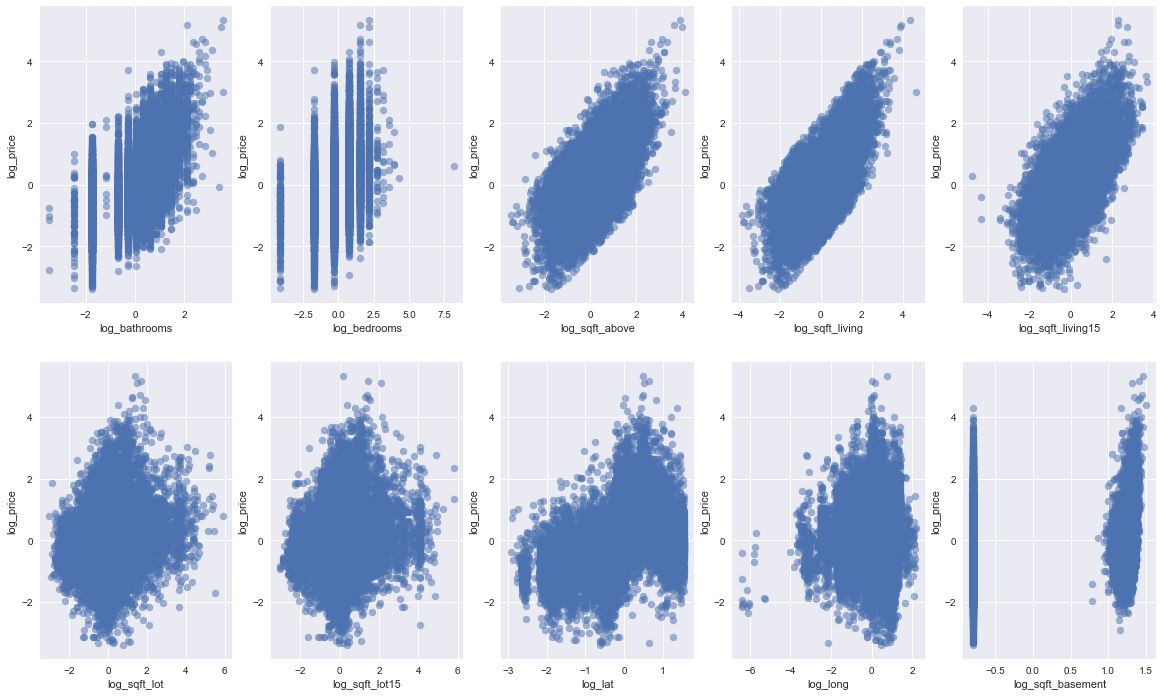

In [90]:
# Look at scatter plots of the continuous variables vs. log_price and check for linearity:
f, ax = plt.subplots(nrows=2, ncols=5, figsize=(20, 12))
for i, col_name in enumerate(df_features.columns):
    ax = ax.flatten()
    ax[i].scatter(df_features[col_name], df_target.log_price, alpha=0.5)
    ax[i].set_xlabel(col_name)
    ax[i].set_ylabel('log_price')
    # A linear relationship appears between various sqft types and price. Also, a somewhat linear relationship between
    # bathrooms & bedrooms and price. Latitude might be a little bit.

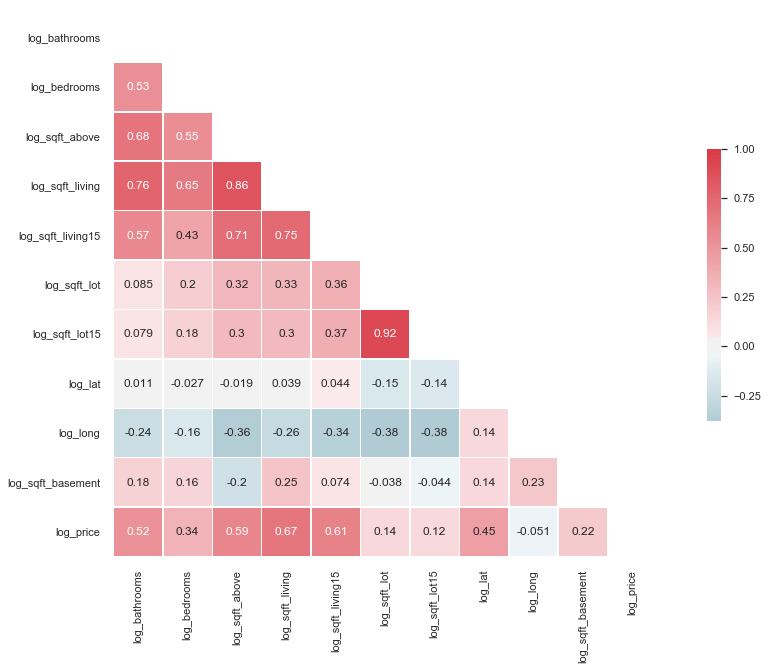

In [91]:
# Plot a heatmap to look at correlation values between columns:
df_cont_var = pd.concat([df_features, df_target], axis=1)
sns.set(style="white")
corr = df_cont_var.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(18,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True);
# Predictably sqft_living, sqft_living15, sqft_above are highly correlated with each other. I'm going to drop
# log_sqft_living15, log_sqft_above because they are very similar and highly correlated. And sqft_lot15 too.

In [92]:
# Create dummy variables for categorical variables:
waterfront_dummies = pd.get_dummies(df['waterfront'], prefix="wtrfrt")
condtion_dummies = pd.get_dummies(df['condition'], prefix='cond')
floors_dummies = pd.get_dummies(df['floors'], prefix="flrs")
grade_dummies = pd.get_dummies(df['grade'], prefix='grade')
view_dummies = pd.get_dummies(df['view'], prefix='view')
zipcode_dummies = pd.get_dummies(df['zipcode'], prefix="zc")
yr_built_dummies = pd.get_dummies(df['yr_built'], prefix='y_b')
yr_renovated_dummies = pd.get_dummies(df['yr_renovated'], prefix='y_r')

In [93]:
# Create a dataframe of all predictor variables:
df_final = pd.DataFrame([])
df_final['log_bathrooms'] = df_features['log_bathrooms']
df_final['log_bedrooms'] = df_features['log_bedrooms']
df_final['log_sqft_living'] = df_features['log_sqft_living']
df_final['log_sqft_lot'] = df_features['log_sqft_lot']
df_final['log_lat'] = df_features['log_lat']
df_final['log_long'] = df_features['log_long']
df_final['log_sqft_basement'] = df_features['log_sqft_basement']

In [94]:
# Join the dummy variable columns:
df_final = pd.concat([df_final, waterfront_dummies, condtion_dummies, floors_dummies, grade_dummies, view_dummies, zipcode_dummies, yr_built_dummies, yr_renovated_dummies], axis=1)

In [95]:
# Check the shape:
df_final.shape

(21597, 292)

In [96]:
# Set the data type in the dummy columns to 'category' type:
for categories in df_final.iloc[:,7:292].columns:
    df_final[categories] = df_final[categories].astype('category')

In [97]:
# Import library for ols:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [98]:
# Add target variable to dataframe:
df_final = pd.concat([df_final, df_target['log_price']], axis=1)

In [99]:
# Check that the target is removed for modeling only the continuous variables:
cont_var = df_final.describe().columns.drop('log_price')
cont_var

Index(['log_bathrooms', 'log_bedrooms', 'log_sqft_living', 'log_sqft_lot',
       'log_lat', 'log_long', 'log_sqft_basement'],
      dtype='object')

In [100]:
# Run an OLS regression between log_price & each independent continuous variable:
results=[['variable','r-squared','intercept','slope','p-value']]
for index, value in enumerate(cont_var):
    f='log_price~' + value
    model = smf.ols(formula=f, data=df_final).fit()
    var_name = cont_var[index]
    r_sq = model.rsquared
    b = model.params[0]
    m = model.params[1]
    p_value = model.pvalues[1]
    results.append([var_name, r_sq, b, m, p_value])
    print('log_price = ', round(m,3), '*',var_name, '+', round(b,3))
    print('R-squared =', round(r_sq,3), '  ', 'p-value = ', round(p_value, 3))
    print('')
pd.DataFrame(results)

log_price =  0.52 * log_bathrooms + 0.0
R-squared = 0.271    p-value =  0.0

log_price =  0.343 * log_bedrooms + 0.0
R-squared = 0.118    p-value =  0.0

log_price =  0.675 * log_sqft_living + 0.0
R-squared = 0.455    p-value =  0.0

log_price =  0.138 * log_sqft_lot + 0.0
R-squared = 0.019    p-value =  0.0

log_price =  0.449 * log_lat + 0.0
R-squared = 0.202    p-value =  0.0

log_price =  -0.051 * log_long + 0.0
R-squared = 0.003    p-value =  0.0

log_price =  0.218 * log_sqft_basement + 0.0
R-squared = 0.048    p-value =  0.0



,0,1,2,3,4
0,variable,r-squared,intercept,slope,p-value
1,log_bathrooms,0.27069,1.35308e-15,0.520278,0
2,log_bedrooms,0.117546,1.35308e-15,0.34285,0
3,log_sqft_living,0.455357,1.35308e-15,0.674802,0
4,log_sqft_lot,0.019116,1.35308e-15,0.138261,1.21474e-92
5,log_lat,0.201721,9.30818e-14,0.449133,0
6,log_long,0.00258345,7.43849e-15,-0.0508277,7.77974e-14
7,log_sqft_basement,0.0475397,1.35308e-15,0.218036,9.88806e-231


In [101]:
# p-values are all ok for inclusion. Significant r-squared values for bathrooms, bedrooms, sqft_living, lat.
# I will remove sqft_lot, long, and sqft_basement from my model based on low r-squared values

In [102]:
# Getting an error with the dummy floor variable- need to change name to eliminate '.':
df_final.rename(columns={'flrs_1.0':'flrs_1','flrs_1.5':'flrs_1_5','flrs_2.0':'flrs_2',
                         'flrs_2.5':'flrs_2_5', 'flrs_3.0':'flrs_3', 'flrs_3.5':'flrs_3_5'}, inplace=True)

In [103]:
# Creating variables that encompass all the columns of each one-hot-encoded categorical variable:
cols_condition = df_final.columns[9:13]
cols_waterfront = df_final.columns[7:8]
cols_view = df_final.columns[31:35]
cols_grade = df_final.columns[20:30]
cols_floors = df_final.columns[14:20]
cols_zipcode= df_final.columns[36:105]
cols_yr_built= df_final.columns[106:221]
cols_yr_renovated= df_final.columns[222:291]

In [104]:
# Run an OLS linear regression of each group of categorical variables vs. log_price:
cat_results= [['variable','r-squared','intercept','slope','p-value']]
cols= [cols_condition, cols_waterfront, cols_view, cols_grade, cols_floors, cols_zipcode, 
       cols_yr_built, cols_yr_renovated]
for col in cols:
    sum_cols = "+".join(col)
    formula = "log_price~" + sum_cols
    model = smf.ols(formula=formula, data=df_final).fit()
    var_name = cols[index]
    r_sq = model.rsquared
    b = model.params[0]
    m = model.params[1]
    p_value = model.pvalues[1]
    cat_results.append([col, r_sq, b, m, p_value])
pd.DataFrame(cat_results)

,0,1,2,3,4
0,variable,r-squared,intercept,slope,p-value
1,"Index(['cond_1', 'cond_2', 'cond_3', 'cond_4']...",0.0135834,0.209129,-1.22594,4.48451e-11
2,"Index(['wtrfrt_0'], dtype='object')",0.0291453,2.06934,-2.08342,6.30341e-141
3,"Index(['view_0', 'view_1', 'view_2', 'view_3']...",0.122593,1.83545,-1.94377,2.8481e-285
4,"Index(['grade_3', 'grade_4', 'grade_5', 'grade...",0.497283,3.76038,-4.84692,4.63199e-11
5,"Index(['flrs_1', 'flrs_1_5', 'flrs_2', 'flrs_2...",0.114439,0.319564,-0.646927,2.71546e-34
6,"Index(['zc_98001', 'zc_98002', 'zc_98003', 'zc...",0.529919,0.83408,-1.88829,1.43737e-271
7,"Index(['y_b_1900', 'y_b_1901', 'y_b_1902', 'y_...",0.0796749,0.705432,-0.517166,0.00569814
8,"Index(['y_r_0', 'y_r_1934', 'y_r_1940', 'y_r_1...",0.0185619,0.601718,-0.62184,0.0190865


In [105]:
# p-values are all ok for inclusion (although yr variables are close). Significant r-squared values for 
# view, grade, floors & zipcode. I will remove condition, waterfront, yr_built, and yr_renovated 
# from my model based on low r-squared values.

In [106]:
# Run a multiple linear regression to predict the dependent variable using all the independent variables:
import statsmodels.api as sn
from statsmodels.formula.api import ols

outcome = 'log_price'
predictors = df_final.drop('log_price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

model = ols(formula=formula, data=df_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     596.4
Date:                Mon, 19 Nov 2018   Prob (F-statistic):               0.00
Time:                        20:04:01   Log-Likelihood:                -6982.0
No. Observations:               21597   AIC:                         1.453e+04
Df Residuals:                   21312   BIC:                         1.681e+04
Df Model:                         284                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.961e+11   1.24e+11     -1.585      0.113   -4.39e+11    4.64e+10
wtrfrt_0[T.1]     -1.476e+11   9.31e+10     -1.585      0.113    -3.3e+11    3.49e+10
wtrfrt_1[T.1]     -1.476e+11   9.31e+10     -1.585      0.113    -3.3e+11    3.49e+10
cond_1[T.1]        2.395e+09   1.51e+09      1.585      0.113   -5.67e+08    5.36e+09
cond_2[T.1]        2.395e+09   1.51e+09      1.585      0.113   -5.67e+08    5.36e+09
cond_3[T.1]        2.395e+09   1.51e+09      1.585      0.113   -5.67e+08    5.36e+09
cond_4[T.1]        2.395e+09   1.51e+09      1.585      0.113   -5.67e+08    5.36e+09
cond_5[T.1]        2.395e+09   1.51e+09      1.585      0.113   -5.67e+08    5.36e+09
flrs_1[T.1]       -4.402e+10   2.78e+10     -1.585      0.113   -9.85e+10    1.04e+10
flrs_1_5[T.1]     -4.402e+10   2.78e+10     -1.585      0.113   -9.85e+10    1.04e+10
flrs_2[T.1]       -4.402e+10   2.78e+10     -1.585      0.113   -9.85e+10    1.04e+10
flrs_2_5[T.1]     -4.402e+10   2.78e+10     -1.585      0.113   -9.85e+10    1.04e+10
flrs_3[T.1]       -4.402e+10   2.78e+10     -1.585      0.113   -9.85e+10    1.04e+10
flrs_3_5[T.1]     -4.402e+10   2.78e+10     -1.585      0.113   -9.85e+10    1.04e+10
grade_3[T.1]       1.138e+11   7.18e+10      1.585      0.113    -2.7e+10    2.55e+11
grade_4[T.1]       1.138e+11   7.18e+10      1.585      0.113    -2.7e+10    2.55e+11
grade_5[T.1]       1.138e+11   7.18e+10      1.585      0.113    -2.7e+10    2.55e+11
grade_6[T.1]       1.138e+11   7.18e+10      1.585      0.113    -2.7e+10    2.55e+11
grade_7[T.1]       1.138e+11   7.18e+10      1.585      0.113    -2.7e+10    2.55e+11
grade_8[T.1]       1.138e+11   7.18e+10      1.585      0.113    -2.7e+10    2.55e+11
grade_9[T.1]       1.138e+11   7.18e+10      1.585      0.113    -2.7e+10    2.55e+11
grade_10[T.1]      1.138e+11   7.18e+10      1.585      0.113    -2.7e+10    2.55e+11
grade_11[T.1]      1.138e+11   7.18e+10      1.585      0.113    -2.7e+10    2.55e+11
grade_12[T.1]      1.138e+11   7.18e+10      1.585      0.113    -2.7e+10    2.55e+11
grade_13[T.1]      1.138e+11   7.18e+10      1.585      0.113    -2.7e+10    2.55e+11
view_0[T.1]        2.272e+11   1.43e+11      1.585      0.113   -5.38e+10    5.08e+11
view_1[T.1]        2.272e+11   1.43e+11      1.585      0.113   -5.38e+10    5.08e+11
view_2[T.1]        2.272e+11   1.43e+11      1.585      0.113   -5.38e+10    5.08e+11
view_3[T.1]        2.272e+11   1.43e+11      1.585      0.113   -5.38e+10    5.08e+11
view_4[T.1]        2.272e+11   1.43e+11      1.585      0.113   -5.38e+10    5.08e+11
zc_98001[T.1]      1.722e+10   1.09e+10      1.585      0.113   -4.08e+09    3.85e+10
zc_98002[T.1]      1.722e+10   1.09e+10      1.585      0.113   -4.08e+09    3.85e+10
zc_98003[T.1]      1.722e+10   1.09e+10      1.585      0.113   -4.08e+09

In [107]:
# p-values above are greater than 0.05 so this model is not good.

In [108]:
# Create y for containing the target variable for model evaluation:
y = df_final['log_price']

In [109]:
# Create X for containing my determined best predictor variables for model evaluation:
X_2 = df_final.drop(df_final.columns[106:293], axis=1)
X_1 = X_2.drop(df_final.columns[5:14], axis=1)
X = X_1.drop(df_final.columns[3:4], axis=1)
X.columns

Index(['log_bathrooms', 'log_bedrooms', 'log_sqft_living', 'log_lat', 'flrs_1',
       'flrs_1_5', 'flrs_2', 'flrs_2_5', 'flrs_3', 'flrs_3_5', 'grade_3',
       'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'grade_13', 'view_0', 'view_1',
       'view_2', 'view_3', 'view_4', 'zc_98001', 'zc_98002', 'zc_98003',
       'zc_98004', 'zc_98005', 'zc_98006', 'zc_98007', 'zc_98008', 'zc_98010',
       'zc_98011', 'zc_98014', 'zc_98019', 'zc_98022', 'zc_98023', 'zc_98024',
       'zc_98027', 'zc_98028', 'zc_98029', 'zc_98030', 'zc_98031', 'zc_98032',
       'zc_98033', 'zc_98034', 'zc_98038', 'zc_98039', 'zc_98040', 'zc_98042',
       'zc_98045', 'zc_98052', 'zc_98053', 'zc_98055', 'zc_98056', 'zc_98058',
       'zc_98059', 'zc_98065', 'zc_98070', 'zc_98072', 'zc_98074', 'zc_98075',
       'zc_98077', 'zc_98092', 'zc_98102', 'zc_98103', 'zc_98105', 'zc_98106',
       'zc_98107', 'zc_98108', 'zc_98109', 'zc_98112', 'zc_98115', 'zc_9

In [110]:
# RFE for feature selection:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 5)
selector = selector.fit(X, np.ravel(y))
names= X.columns
estimators = selector.estimator_
selected_columns = X.columns[selector.support_]
print("Top 5 features: ",selected_columns)
print("")
print("Top 5 features Coefficients with Intercept=", round(estimators.intercept_,4))
print(sorted(zip(map(lambda x: round(x,4),estimators.coef_), selected_columns)))
print("")
print("All model features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), selector.ranking_), names)))

# This shows that various grades rate as the highest predictors

Top 5 features:  Index(['grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13'], dtype='object')

Top 5 features Coefficients with Intercept= -0.2839
[(1.118, 'grade_9'), (1.7174, 'grade_10'), (2.3419, 'grade_11'), (3.0689, 'grade_12'), (4.0443, 'grade_13')]

All model features sorted by their rank:
[(1, 'grade_10'), (1, 'grade_11'), (1, 'grade_12'), (1, 'grade_13'), (1, 'grade_9'), (2, 'grade_8'), (3, 'grade_7'), (4, 'grade_6'), (5, 'grade_3'), (6, 'grade_5'), (7, 'grade_4'), (8, 'flrs_2'), (9, 'flrs_3'), (10, 'flrs_1'), (11, 'flrs_3_5'), (12, 'flrs_2_5'), (13, 'flrs_1_5'), (14, 'view_0'), (15, 'view_2'), (16, 'view_3'), (17, 'view_1'), (18, 'view_4'), (19, 'zc_98039'), (20, 'zc_98004'), (21, 'zc_98112'), (22, 'zc_98040'), (23, 'zc_98105'), (24, 'zc_98109'), (25, 'zc_98119'), (26, 'zc_98033'), (27, 'zc_98102'), (28, 'zc_98005'), (29, 'zc_98199'), (30, 'zc_98115'), (31, 'zc_98117'), (32, 'zc_98103'), (33, 'zc_98107'), (34, 'zc_98008'), (35, 'zc_98122'), (36, 'zc_98116'), (37, 'zc_98

In [115]:
# Perform a train-test-split with a test set of 0.2 to validate the model

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
linreg= LinearRegression()
linreg.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print("Mean squared error of training data set: ", round(train_mse,4))
print("Mean squared error of test data set: ", round(test_mse,4))

Mean squared error of training data set:  0.1326
Mean squared error of test data set:  0.1339


In [48]:
# The mean squared error of the training & test data sets are very close. The values are very small which validates model.

In [116]:
# Perform a 5-fold cross validation:
from sklearn.model_selection import cross_val_score

cross_val_score(linreg, X, y, cv=5, scoring="r2")

array([-2.01218747e+17,  8.62144086e-01,  8.58726198e-01,  8.69686839e-01,
        8.70805178e-01])

In [117]:
cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error")

array([-2.09085139e+17, -1.37285355e-01, -1.35799476e-01, -1.35694161e-01,
       -1.22435315e-01])

In [51]:
# The 5-fold cross validation is showing a problem with my model even though the train-test-split showed ok.
# The k-fold cross validation is sampling more than the train-test-split so I think the model needs more revision.

In [52]:
# I am going to remove all the zipcode, view, floors and the lower grades and test again:

In [118]:
X.columns

Index(['log_bathrooms', 'log_bedrooms', 'log_sqft_living', 'log_lat', 'flrs_1',
       'flrs_1_5', 'flrs_2', 'flrs_2_5', 'flrs_3', 'flrs_3_5', 'grade_3',
       'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'grade_13', 'view_0', 'view_1',
       'view_2', 'view_3', 'view_4', 'zc_98001', 'zc_98002', 'zc_98003',
       'zc_98004', 'zc_98005', 'zc_98006', 'zc_98007', 'zc_98008', 'zc_98010',
       'zc_98011', 'zc_98014', 'zc_98019', 'zc_98022', 'zc_98023', 'zc_98024',
       'zc_98027', 'zc_98028', 'zc_98029', 'zc_98030', 'zc_98031', 'zc_98032',
       'zc_98033', 'zc_98034', 'zc_98038', 'zc_98039', 'zc_98040', 'zc_98042',
       'zc_98045', 'zc_98052', 'zc_98053', 'zc_98055', 'zc_98056', 'zc_98058',
       'zc_98059', 'zc_98065', 'zc_98070', 'zc_98072', 'zc_98074', 'zc_98075',
       'zc_98077', 'zc_98092', 'zc_98102', 'zc_98103', 'zc_98105', 'zc_98106',
       'zc_98107', 'zc_98108', 'zc_98109', 'zc_98112', 'zc_98115', 'zc_9

In [119]:
X_revised = X.drop(['flrs_1','flrs_1_5', 'flrs_2', 'flrs_2_5', 'flrs_3', 'flrs_3_5', 'grade_3',
                   'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8','view_0', 'view_1',
                   'view_2', 'view_3', 'view_4', 'zc_98001', 'zc_98002', 'zc_98003',
                   'zc_98004', 'zc_98005', 'zc_98006', 'zc_98007', 'zc_98008', 'zc_98010',
                   'zc_98011', 'zc_98014', 'zc_98019', 'zc_98022', 'zc_98023', 'zc_98024',
                   'zc_98027', 'zc_98028', 'zc_98029', 'zc_98030', 'zc_98031', 'zc_98032',
                   'zc_98033', 'zc_98034', 'zc_98038', 'zc_98039', 'zc_98040', 'zc_98042',
                   'zc_98045', 'zc_98052', 'zc_98053', 'zc_98055', 'zc_98056', 'zc_98058',
                   'zc_98059', 'zc_98065', 'zc_98070', 'zc_98072', 'zc_98074', 'zc_98075',
                   'zc_98077', 'zc_98092', 'zc_98102', 'zc_98103', 'zc_98105', 'zc_98106',
                   'zc_98107', 'zc_98108', 'zc_98109', 'zc_98112', 'zc_98115', 'zc_98116',
                   'zc_98117', 'zc_98118', 'zc_98119', 'zc_98122', 'zc_98125', 'zc_98126',
                   'zc_98133', 'zc_98136', 'zc_98144', 'zc_98146', 'zc_98148', 'zc_98155',
                   'zc_98166', 'zc_98168', 'zc_98177', 'zc_98178', 'zc_98188', 'zc_98198',
                   'zc_98199'], axis=1)
X_revised.columns

Index(['log_bathrooms', 'log_bedrooms', 'log_sqft_living', 'log_lat',
       'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13'],
      dtype='object')

In [120]:
# Run multiple linear regression again on X_revised:
from sklearn.linear_model import LinearRegression

linreg_revised = LinearRegression().fit(X_revised, y)
print('R-squared for X_revised:', linreg_revised.score(X_revised, y))
print('Coefficients for X_revised:', linreg_revised.coef_)
print('Intercept for X_revised:', linreg_revised.intercept_)

R-squared for X_revised: 0.6893917404239869
Coefficients for X_revised: [ 0.04422772 -0.07174003  0.51025566  0.40385033  0.4491063   0.74885883
  1.08038689  1.55213346  2.05597969]
Intercept for X_revised: -0.1212928119018273


In [136]:
#Train-test-split on X_revised:
X_rev_train, X_rev_test, y_rev_train, y_rev_test = train_test_split(X_revised, y, test_size=0.2)
reg = LinearRegression()
model = reg.fit(X_rev_train, y_rev_train)
predictions = reg.predict(X_rev_test)

print("R-squared for X_revised:", model.score(X_rev_test, y_rev_test))

R-squared for X_revised: 0.6877630591341741


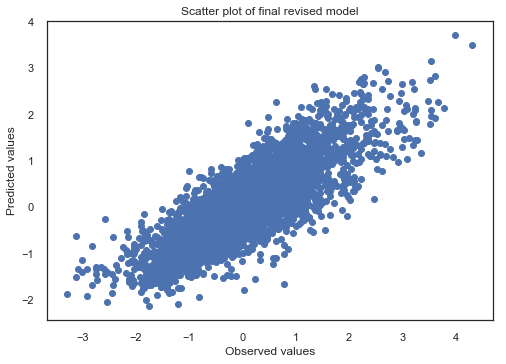

In [122]:
# The line / model
plt.scatter(y_rev_test, predictions)
plt.xlabel('Observed values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of final revised model')
plt.show();

In [69]:
# k-fold cross validation for R-squared on X_revised:
cv_5_mean = np.mean(cross_val_score(linreg, X_revised, y, cv=5, scoring="r2"))
cv_10_mean = np.mean(cross_val_score(linreg, X_revised, y, cv=10, scoring="r2"))
cv_20_mean = np.mean(cross_val_score(linreg, X_revised, y, cv=20, scoring="r2"))
print("Mean R-squared for 5 folds:", cv_5_mean)
print("Mean R-squared for 10 folds:", cv_10_mean)
print("Mean R-squared for 20 folds:", cv_20_mean)

Mean R-squared for 5 folds: 0.6882387119182847
Mean R-squared for 10 folds: 0.6878282936067805
Mean R-squared for 20 folds: 0.6877492186348857


In [70]:
# k-fold cross validation for neg_mean_squared_error on X_revised:
cv_5_mean = np.mean(cross_val_score(linreg, X_revised, y, cv=5, scoring="neg_mean_squared_error"))
cv_10_mean = np.mean(cross_val_score(linreg, X_revised, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_mean = np.mean(cross_val_score(linreg, X_revised, y, cv=20, scoring="neg_mean_squared_error"))
print("Negative MSE for 5 folds:", cv_5_mean)
print("Negative MSE for 10 folds:", cv_10_mean)
print("Negative MSE for 20 folds:", cv_20_mean)

Negative MSE for 5 folds: -0.31114670840830005
Negative MSE for 10 folds: -0.3111509812941211
Negative MSE for 20 folds: -0.3109948751295894


In [71]:
# Make cross validated predictions
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
cross_predictions = cross_val_predict(model, X_revised, y, cv=5)
accuracy = metrics.r2_score(y, cross_predictions)
print('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.6888519617253741


In [73]:
# The MSE values are very close. The R-squared values are all very close for all validation methods.
# I feel this model will give a reasonably good prediction of price given the values of these independent variables.
# log_price =  -0.1213 + 0.0442*log_bathrooms - 0.0717*log_bedrooms + 0.5102*log_sqft_living 
#       + 0.4038*log_lat + 0.4491*grade_9 +  0.7488*grade_10 + 1.080*grade_11 + 1.552*grade_12 + 2.056*grade_13